## for comparing our results with previous total crypto marketcap

In [1]:
# !pip install --upgrade --no-cache-dir git+https://github.com/rongardF/tvdatafeed.git

In [2]:
from tvDatafeed import TvDatafeed, Interval

# username = 'YourTradingViewUsername'
# password = 'YourTradingViewPassword'
# tv = TvDatafeed(username,password)
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [3]:
# index
TOTAL_crypto_market_7d = tv.get_hist(symbol='CRYPTOCAP:TOTAL',exchange='',interval=Interval.in_1_hour,n_bars=168)

TOTAL_crypto_market_7d

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-09-22 19:30:00,CRYPTOCAP:TOTAL,1.035027e+12,1.035362e+12,1.032780e+12,1.033241e+12,4.331496e+10
2023-09-22 20:30:00,CRYPTOCAP:TOTAL,1.033238e+12,1.034185e+12,1.031948e+12,1.033539e+12,4.331496e+10
2023-09-22 21:30:00,CRYPTOCAP:TOTAL,1.033534e+12,1.034752e+12,1.032377e+12,1.034419e+12,4.331496e+10
2023-09-22 22:30:00,CRYPTOCAP:TOTAL,1.034436e+12,1.035996e+12,1.032726e+12,1.032811e+12,4.331496e+10
2023-09-22 23:30:00,CRYPTOCAP:TOTAL,1.032816e+12,1.033526e+12,1.031691e+12,1.032262e+12,4.331496e+10
...,...,...,...,...,...,...
2023-09-29 14:30:00,CRYPTOCAP:TOTAL,1.056152e+12,1.057043e+12,1.054053e+12,1.054254e+12,5.505133e+10
2023-09-29 15:30:00,CRYPTOCAP:TOTAL,1.054307e+12,1.057528e+12,1.053550e+12,1.057186e+12,5.505133e+10
2023-09-29 16:30:00,CRYPTOCAP:TOTAL,1.057194e+12,1.057878e+12,1.053603e+12,1.053615e+12,5.992250e+10


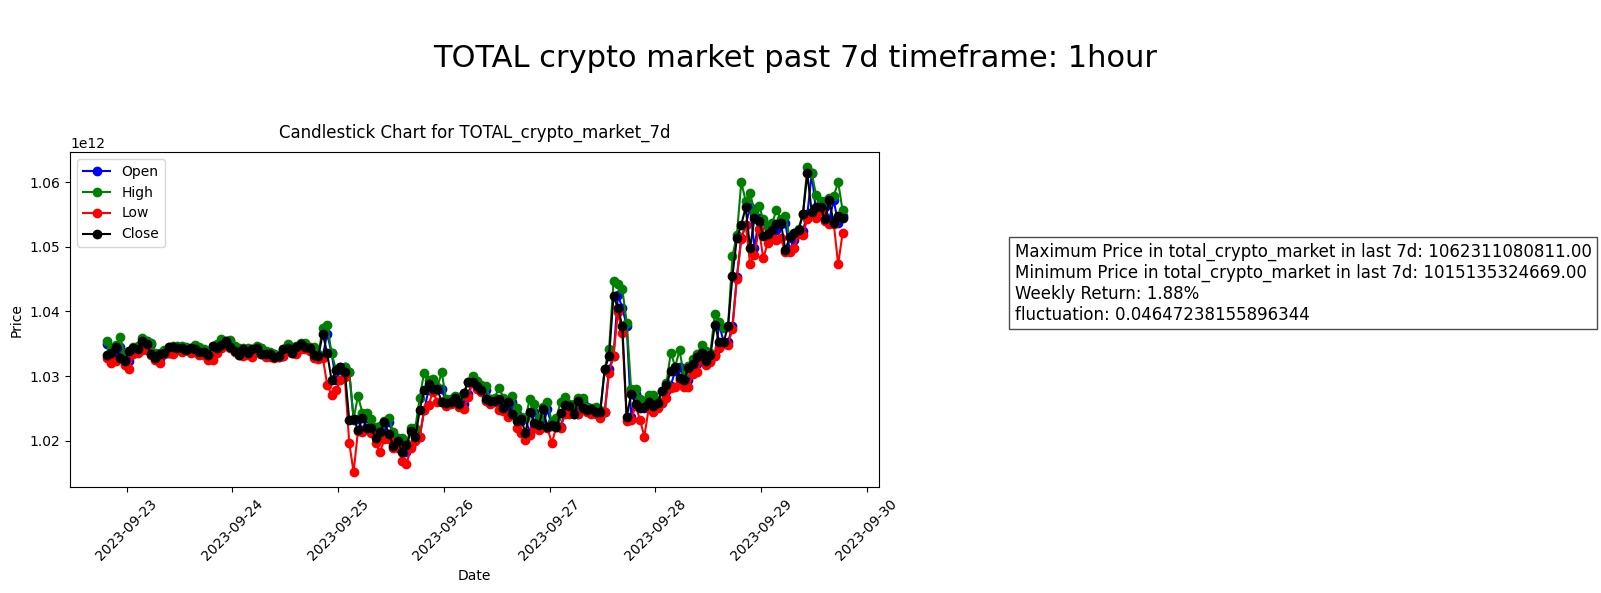

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])  

# Create the first subplot (candlestick chart)
ax1 = plt.subplot(gs[0])

# Set dates as the X-axis with daily intervals
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Plot candlestick chart using open, high, low, and close columns
ax1.plot(TOTAL_crypto_market_7d.index, TOTAL_crypto_market_7d['open'], label='Open', marker='o', color='blue')
ax1.plot(TOTAL_crypto_market_7d.index, TOTAL_crypto_market_7d['high'], label='High', marker='o', color='green')
ax1.plot(TOTAL_crypto_market_7d.index, TOTAL_crypto_market_7d['low'], label='Low', marker='o', color='red')
ax1.plot(TOTAL_crypto_market_7d.index, TOTAL_crypto_market_7d['close'], label='Close', marker='o', color='black')

# Add labels and title to the chart
ax1.set_title('Candlestick Chart for TOTAL_crypto_market_7d', pad=10)  
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()

# Show the chart
plt.xticks(rotation=45)

# Create the second subplot (text with maximum and minimum)
ax2 = plt.subplot(gs[1])

# Calculate the maximum and minimum prices
max_price = TOTAL_crypto_market_7d[['open', 'high', 'low', 'close']].max(axis=1)
min_price = TOTAL_crypto_market_7d[['open', 'high', 'low', 'close']].min(axis=1)

# Calculate the weekly return
first_price = TOTAL_crypto_market_7d['open'].iloc[0]
last_price = TOTAL_crypto_market_7d['close'].iloc[-1]
weekly_return = ((last_price - first_price) / first_price) * 100

# Create the text for maximum and minimum prices and weekly return
max_price_str = f"Maximum Price in total_crypto_market in last 7d: {max_price.max():.2f}"
min_price_str = f"Minimum Price in total_crypto_market in last 7d: {min_price.min():.2f}"
max_min_price_str = f"fluctuation: {(max_price.max() - min_price.min())/(min_price.min())}"
weekly_return_str = f"Weekly Return: {weekly_return:.2f}%"

# Display the text with adjusted spacing
text = max_price_str + '\n' + min_price_str + '\n' + weekly_return_str + '\n' + max_min_price_str
ax2.text(0.5, 0.5, text, fontsize=12, bbox=dict(facecolor='white', alpha=0.7), transform=ax2.transAxes)

# Add a big title to the figure
fig.suptitle('\nTOTAL crypto market past 7d timeframe: 1hour\n', fontsize=22)

# Remove x and y axis labels and ticks from the second subplot
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
